In [2]:
import pandas as pd


In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-05 06:20:49--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.2’

car_fuel_efficiency 100%[===================>] 853.70K  3.61MB/s    in 0.2s    

2025-10-05 06:20:49 (3.61 MB/s) - ‘car_fuel_efficiency.csv.2’ saved [874188/874188]



In [3]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [4]:
df.head(5)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
#prepare the dataset

df.drop(['num_cylinders', 'acceleration', 'origin', 'fuel_type', 'drivetrain', 'num_doors'], axis = 1,inplace=True)

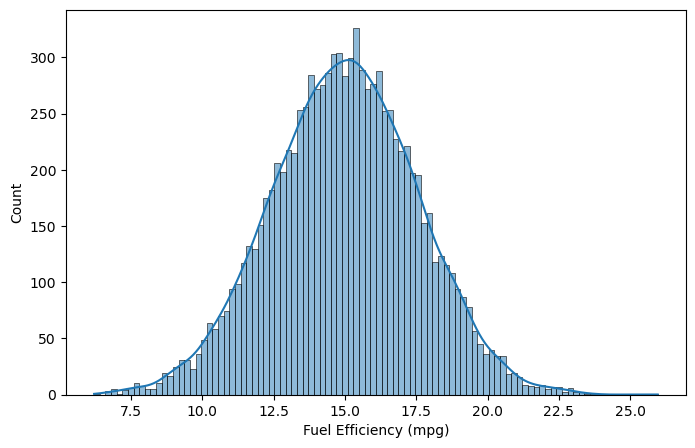

In [6]:
#EDA 

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))


sns.histplot(df['fuel_efficiency_mpg'],bins=100,kde=True)
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Count')
plt.show()


In [11]:
# Fuel efficiency have a slight long tail at right

In [8]:
#Q1 What is one column with missing value ?  - horsepower with 708 values missing

df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [9]:
# Q2 What's the median (50% percentile) for variable 'horsepower'? - 149.0

df['horsepower'].median()

149.0

In [10]:
import numpy as np

In [ ]:
# Prepare and split the dataset

#shuffling 
np.random.seed(42)

n = len(df)

n_test = int(0.2 * n) #20% for test
n_val = int(0.2 * n) #20 for validation 
n_train = n - (n_val + n_test) #remaining 40 for training

idx = np.arange(n)

np.random.shuffle(idx)

In [12]:
#shuffling

df_shuffled = df.iloc[idx]

In [13]:
#splitting dataset into train/val/test sets, with 60%/20%/20%

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


In [14]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values


In [15]:
#Q3 - Handling missing values

df_train.isnull().sum()



engine_displacement      0
horsepower             413
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [16]:
#fill with zero

df_train_0 = df_train.copy()
df_train_0['horsepower']=df_train_0['horsepower'].fillna(0)

In [17]:
df_train_0.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64

In [18]:
#Linear Regression Function

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [19]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [20]:
# Linear regression applying
X_train_0 = df_train_0.drop(['fuel_efficiency_mpg'], axis = 1)
w0, w1 = train_linear_regression(X_train_0, y_train)
w0, w1

(np.float64(25.90435760833672),
 array([ 0.0001526 ,  0.00378541, -0.00500641,  0.00176812]))

In [21]:
y_pred_0 = w0 + X_train_0.dot(w1)

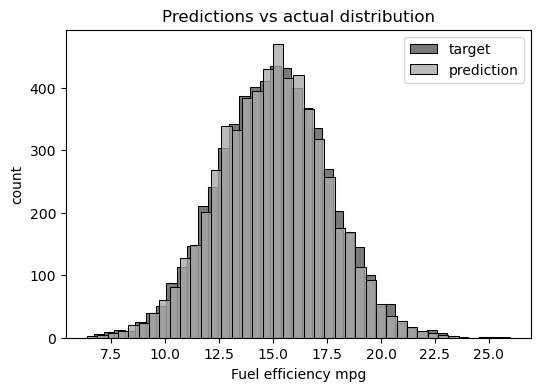

In [22]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_0, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('count')
plt.xlabel('Fuel efficiency mpg')
plt.title('Predictions vs actual distribution')

plt.show()

In [23]:
df_val.isnull().sum()

engine_displacement      0
horsepower             134
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [25]:
#predict using validation dataset

df_test_val = df_val.fillna(0)

In [26]:
X_test_val = df_test_val.drop(['fuel_efficiency_mpg'], axis=1)

In [27]:
y_test_val = df_test_val['fuel_efficiency_mpg']

In [28]:
y_val_pred = w0 + X_test_val.dot(w1)

In [29]:
rmse_0 = rmse(y_val, y_val_pred)
rmse_0

np.float64(0.5228069974694654)

In [30]:
#fill with mean

df_train_mean = df_train.copy()
mean = df_train_mean['horsepower'].mean()
df_train_mean['horsepower'] = df_train_mean['horsepower'].fillna(mean)

In [31]:

#fill with mean
df_train_mean.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64

In [32]:
X_train_mean = df_train_mean.drop(['fuel_efficiency_mpg'],axis=1)

In [33]:
w0, w1 = train_linear_regression(X_train_mean, y_train)

In [34]:
y_pred_mean = w0 + X_train_mean.dot(w1)

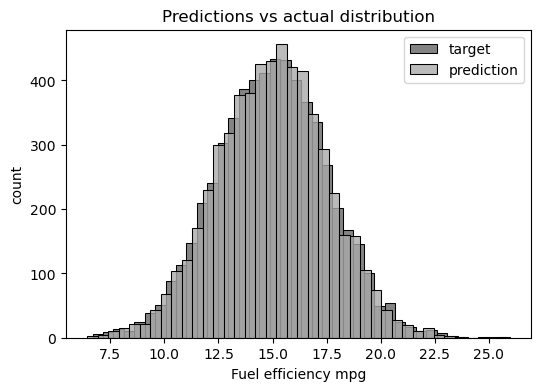

In [35]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#333333', alpha=0.6, bins=40)
sns.histplot(y_pred_mean, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('count')
plt.xlabel('Fuel efficiency mpg')
plt.title('Predictions vs actual distribution')

plt.show()

In [46]:
#predict using validation dataset

#fill with mean

mean = df_val['horsepower'].mean()
df_test_val = df_val.copy()
df_test_val['horsepower'] = df_test_val['horsepower'].fillna(mean)

In [47]:
X_test_val_mean = df_test_val.drop(['fuel_efficiency_mpg'],axis=1)

In [48]:
y_test_val_mean = df_test_val['fuel_efficiency_mpg']

In [49]:
y_val_mean_pred = w0 + X_test_val_mean.dot(w1)

In [50]:
rmse_mean = rmse(y_test_val_mean, y_val_mean_pred)
rmse_mean

np.float64(0.46974029192429934)

## Regularization model

In [42]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [43]:
df_train.fillna(0,inplace=True)

In [44]:
df_train.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64

In [51]:
X_train = df_train.drop(['fuel_efficiency_mpg'],axis=1)

In [52]:
y_train = df_train['fuel_efficiency_mpg']

In [53]:
df_val.fillna(0,inplace=True)

In [55]:
X_val = df_val.drop(['fuel_efficiency_mpg'],axis=1)

In [56]:
y_val = df_val['fuel_efficiency_mpg']

In [57]:

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

     0 0.5228069974694654
  0.01 0.5230773875533775
   0.1 0.5260746881702593
     1 0.5299717572328457
     5 0.5306504452034391
    10 0.5307423097118001
   100 0.5308264158427396


In [63]:
import numpy as np

rmse_scores = []   # list to store RMSE values for each seed

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)

    n = len(df)
    n_test = int(0.2 * n)
    n_val = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    # Split the dataset
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    # Target and features
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values

    df_train.fillna(0, inplace=True)
    df_val.fillna(0, inplace=True)

    X_train = df_train.drop(['fuel_efficiency_mpg'], axis=1)
    X_val = df_val.drop(['fuel_efficiency_mpg'], axis=1)

    # Train and predict
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_val.dot(w)

    # Compute RMSE
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)
    print(f"Seed {s}: RMSE = {score:.3f}")

# Compute standard deviation
std = np.std(rmse_scores)
print("\nStandard deviation of RMSE scores:", round(std, 3))


Seed 0: RMSE = 0.521
Seed 1: RMSE = 0.521
Seed 2: RMSE = 0.523
Seed 3: RMSE = 0.516
Seed 4: RMSE = 0.511
Seed 5: RMSE = 0.528
Seed 6: RMSE = 0.531
Seed 7: RMSE = 0.509
Seed 8: RMSE = 0.515
Seed 9: RMSE = 0.513

Standard deviation of RMSE scores: 0.007


In [64]:
# seed 9
np.random.seed(9)

n = len(df)
n_test = int(0.2 * n)
n_val = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

# Split the dataset
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# Combine train and validation sets
df_full_train = pd.concat([df_train, df_val])

# Target and features
y_full_train = df_full_train.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# Fill missing values with 0
df_full_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

X_full_train = df_full_train.drop(['fuel_efficiency_mpg'], axis=1)
X_test = df_test.drop(['fuel_efficiency_mpg'], axis=1)

# Train model with regularization r=0.001
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

# Predict on test set
y_pred = w_0 + X_test.dot(w)

# Compute RMSE
score = rmse(y_test, y_pred)
print(f"RMSE on test set: {score:.3f}")


RMSE on test set: 0.516
